In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

In [3]:
#api info at https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36
#table info https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

client = Socrata("data.cdc.gov",None)

In [4]:
results = client.get("9mfq-cb36", limit=100000)

In [5]:
covid_df = pd.DataFrame(results)

In [6]:
#Set date and cutoff the date at january 1st 2022
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.sort_values(by=["submission_date"])
cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]

In [7]:
#Update columns that we can use to intigers and correct date
covid_df["submission_date"]=pd.to_datetime(covid_df["submission_date"])
covid_df["tot_cases"]= covid_df['tot_cases'].apply(lambda x:int(float(x)))
covid_df["conf_cases"].fillna(0, inplace=True)
covid_df["conf_cases"]= covid_df['conf_cases'].apply(lambda x:int(float(x)))
covid_df["prob_cases"].fillna(0, inplace=True)
covid_df["prob_cases"]= covid_df['prob_cases'].apply(lambda x:int(float(x)))
covid_df["new_case"]= covid_df['new_case'].apply(lambda x:int(float(x)))
covid_df["pnew_case"].fillna(0, inplace=True)
covid_df["pnew_case"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))
covid_df["new_death"]= covid_df['new_death'].apply(lambda x:int(float(x)))
covid_df["tot_death"]= covid_df["tot_death"].apply(lambda x:int(float(x)))
covid_df["pnew_death"].fillna(0, inplace=True)
covid_df["pnew_death"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))

cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]


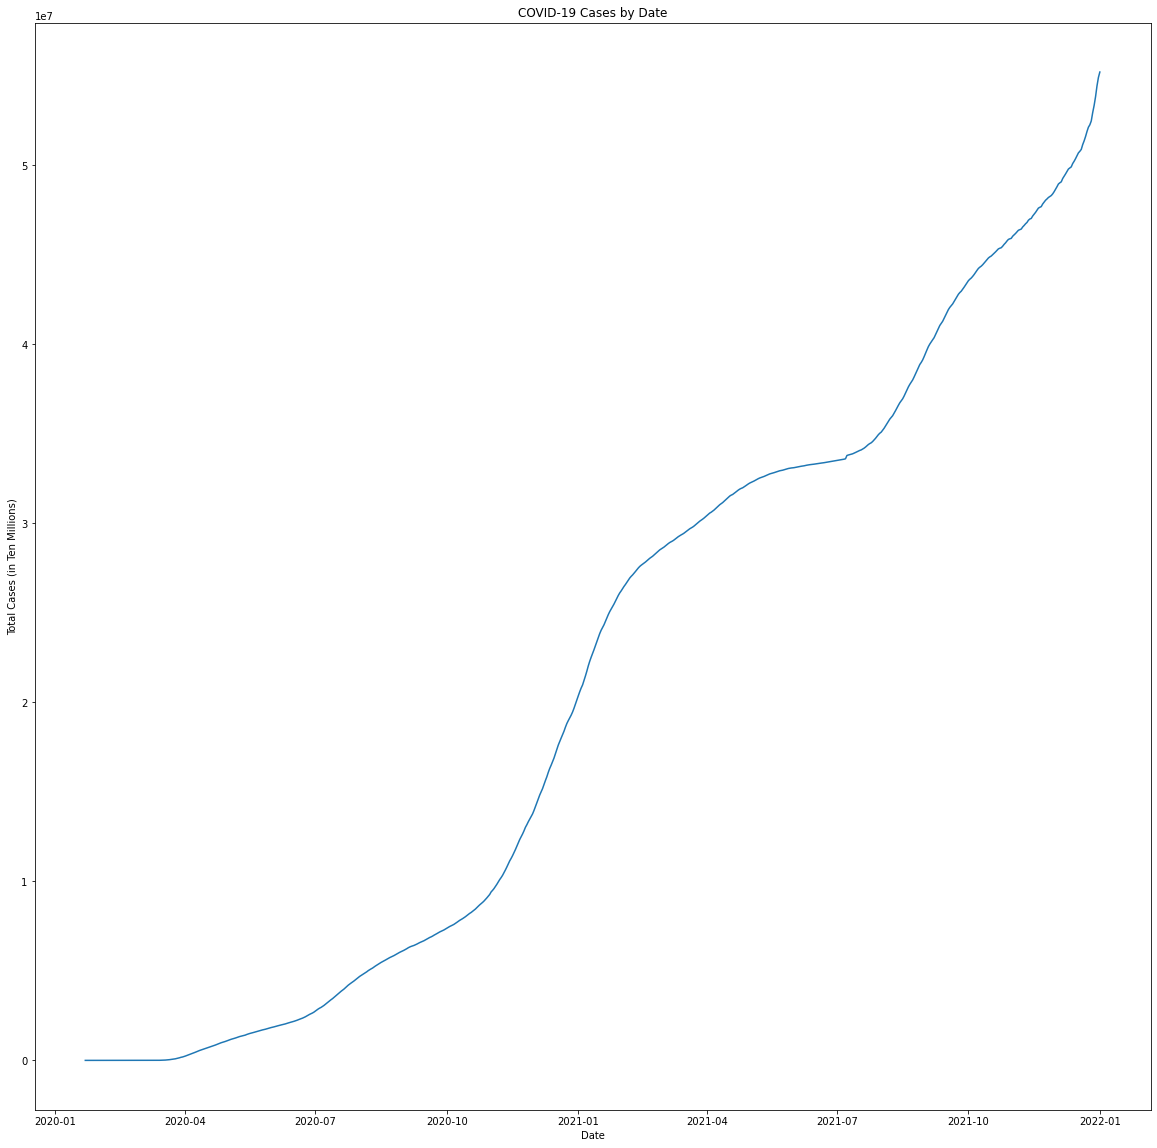

In [37]:
covid_df['submission_date'] = pd.to_datetime(covid_df['submission_date'])
total_states_cases= covid_df.groupby("submission_date").sum()["tot_cases"]
total_states_cases = pd.DataFrame({'date': total_states_cases.index, 'total_cases': total_states_cases.values})

fig, ax = plt.subplots(figsize=(20, 20))
plt.plot(total_states_cases['date'], total_states_cases['total_cases'])
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases (in Ten Millions)')
ax.set_title('COVID-19 Cases by Date')

fig.savefig('covid_cases.png')

In [39]:
total_states_cases = pd.DataFrame(total_states_cases)
total_states_cases
#total_states_cases.to_csv("total_covid_cases.csv", index=False)

Text(0.5, 1.0, 'COVID-19 Deaths')

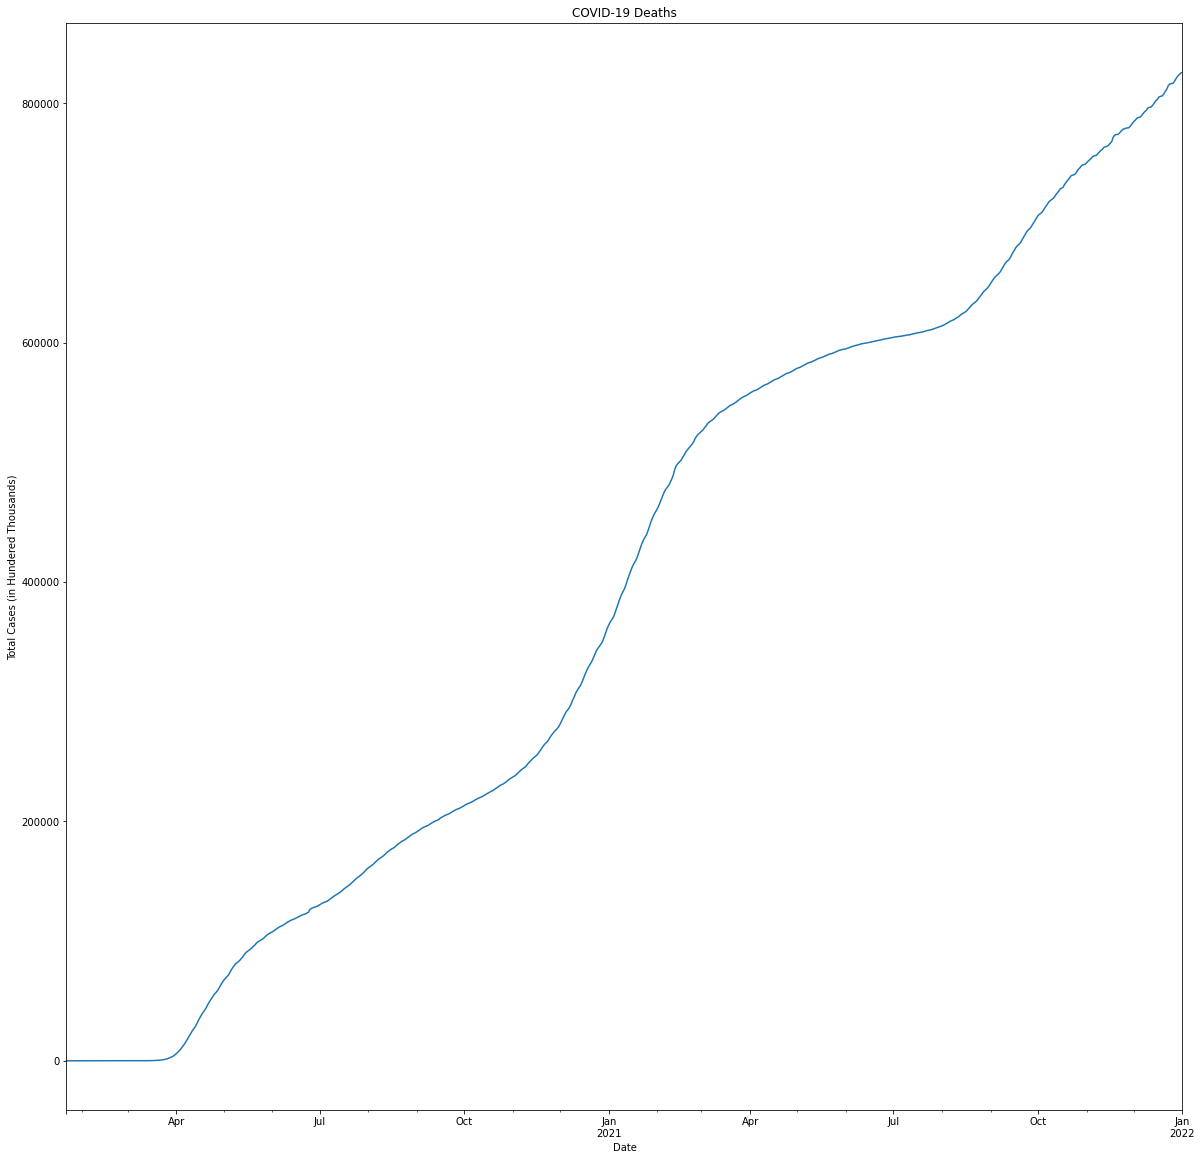

In [13]:
total_states_cases_deaths= covid_df.groupby("submission_date").sum()["tot_death"]

fig, ax = plt.subplots(figsize=(20, 20))
total_states_cases_deaths.plot(kind="line", ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Deaths)')
ax.set_title('COVID-19 Deaths')
